In [1]:
import numpy as np
import pandas as pd

In [4]:
police = pd.read_csv('RTO.csv')

In [5]:
police.shape

(91741, 15)

In [6]:
police.drop(columns = 'county_name', inplace=True)

# WHO OVERSPEEDS THE MOST

In [7]:
police.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [8]:
police[police.violation == 'speeding'].shape

(0, 14)

In [9]:
police.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

### when someone is stopped for speeding how often is it man or a women

In [10]:
police[police.violation == 'speeding'].driver_gender.value_counts(normalize = True)

Series([], Name: driver_gender, dtype: float64)

### when a man is pulled over how often it is overspeeding

In [11]:
police[police.driver_gender == 'M']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,02-01-2005,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,18-01-2005,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,23-01-2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,20-02-2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
5,23-03-2005,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,31-12-2015,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,31-12-2015,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91738,31-12-2015,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,31-12-2015,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [12]:
police[police.driver_gender == 'M'].violation.value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

### when a woman is pulled over how often it is overspeeding

In [13]:
police[police.driver_gender == 'F'].violation.value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

### combine the above two lines

In [14]:
police.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

# Does gender affects a search?

In [15]:
police.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [16]:
police.search_conducted.mean()

0.03483720473942948

In [17]:
police.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

### men are searched at the rate of 4%
### women are searched at the rate of 4%


In [18]:
#include a second factor
police.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [19]:
police.groupby(['driver_race','violation','driver_gender']).search_conducted.mean()

driver_race  violation            driver_gender
Asian        Equipment            F                0.040000
                                  M                0.073864
             Moving violation     F                0.017857
                                  M                0.046763
             Other                F                0.166667
                                  M                0.000000
             Registration/plates  F                0.000000
                                  M                0.023256
             Seat belt            F                0.000000
                                  M                0.102041
             Speeding             F                0.005051
                                  M                0.011504
Black        Equipment            F                0.066937
                                  M                0.094792
             Moving violation     F                0.041096
                                  M                0

# Why is search_type missing?

In [20]:
police.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [21]:
police.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [22]:
police[police.search_conducted == False].search_type.unique()

array([nan], dtype=object)

In [23]:
police[police.search_conducted == True].search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [24]:
police[police.search_conducted == True].search_type.value_counts().sum()

3196

# How often is a driver frisked during a search?

In [25]:
police.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Frisk                                    11
Incident to Arrest,Invent

### using str.contains pandas function
police['Frisk'] = police.search_type.str.contains('Frisk')

In [26]:
police['Frisk'] = police.search_type.str.contains('Frisk')

In [27]:
police['Frisk'].value_counts()

False    2922
True      274
Name: Frisk, dtype: int64

In [28]:
police['Frisk'].sum()

274

# Which year had the least no. of stops?

In [29]:
police.stop_date

0        02-01-2005
1        18-01-2005
2        23-01-2005
3        20-02-2005
4        14-03-2005
            ...    
91736    31-12-2015
91737    31-12-2015
91738    31-12-2015
91739    31-12-2015
91740    31-12-2015
Name: stop_date, Length: 91741, dtype: object

In [30]:
police.stop_date.value_counts()

11-01-2012    69
28-02-2012    65
16-05-2007    62
02-01-2012    61
10-01-2007    60
              ..
14-07-2005     1
21-09-2005     1
02-01-2005     1
28-07-2005     1
14-03-2005     1
Name: stop_date, Length: 3768, dtype: int64

In [31]:
police.stop_date.str.slice(0,4).value_counts()

21-0    2473
10-0    2431
07-0    2386
09-0    2374
23-0    2373
        ... 
01-1     705
22-1     689
24-1     604
25-1     559
31-1     520
Name: stop_date, Length: 62, dtype: int64

In [32]:
police.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk
0,02-01-2005,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,18-01-2005,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [33]:
police.stop_date.str.cat(police.stop_time,sep=' ')

0        02-01-2005 01:55
1        18-01-2005 08:15
2        23-01-2005 23:15
3        20-02-2005 17:15
4        14-03-2005 10:00
               ...       
91736    31-12-2015 20:27
91737    31-12-2015 20:35
91738    31-12-2015 20:45
91739    31-12-2015 21:42
91740    31-12-2015 22:46
Name: stop_date, Length: 91741, dtype: object

In [34]:
combined = police.stop_date.str.cat(police.stop_time,sep=' ')
combined.head(5)

0    02-01-2005 01:55
1    18-01-2005 08:15
2    23-01-2005 23:15
3    20-02-2005 17:15
4    14-03-2005 10:00
Name: stop_date, dtype: object

In [35]:
police['stop_datetime'] = pd.to_datetime(combined)

In [36]:
police['stop_datetime'].head(5)

0   2005-02-01 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
3   2005-02-20 17:15:00
4   2005-03-14 10:00:00
Name: stop_datetime, dtype: datetime64[ns]

In [37]:
police['stop_datetime'].dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [38]:
police['stop_datetime'].dt.year.value_counts().sort_values().index[0]

2005

In [39]:
police['stop_datetime'].dt.hour

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_datetime, Length: 91741, dtype: int64

# How does drug activity change by time of the day?

In [40]:
police.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [41]:
police.drugs_related_stop.mean()

0.008883705213590434

In [42]:
police.groupby(police['stop_datetime'].dt.hour).drugs_related_stop.sum()

stop_datetime
0     103
1      60
2      46
3      20
4       3
5       1
6      10
7      15
8      14
9      43
10     42
11     41
12     16
13     50
14     44
15     31
16     22
17     16
18     22
19     30
20     27
21     20
22     47
23     92
Name: drugs_related_stop, dtype: int64

In [43]:
police.groupby(police['stop_datetime'].dt.hour).drugs_related_stop.sum().plot()

# Do most stops occur at night?

In [44]:
police['stop_datetime'].dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

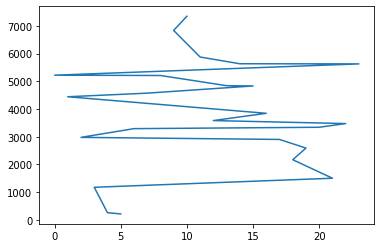

In [45]:
police['stop_datetime'].dt.hour.value_counts().plot()

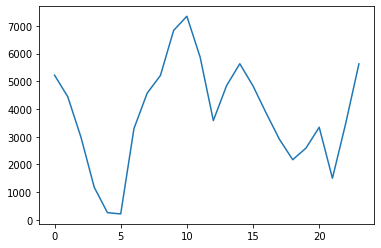

In [46]:
#as the hours are not sorted we need to sort it first
police['stop_datetime'].dt.hour.value_counts().sort_index().plot()

### Find out the bad data in stop duration column and fix it

In [47]:
police.stop_duration

0         0-15 Min
1         0-15 Min
2         0-15 Min
3        16-30 Min
4         0-15 Min
           ...    
91736     0-15 Min
91737     0-15 Min
91738     0-15 Min
91739     0-15 Min
91740     0-15 Min
Name: stop_duration, Length: 91741, dtype: object

In [48]:
police.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [49]:
police.shape

(91741, 16)

In [50]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [51]:
police[(police.stop_duration =='1')|(police.stop_duration =='2')].stop_duration='NaN'#not correct way as 2 nan coloums generated

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [53]:
police.loc[(police.stop_duration =='1')|(police.stop_duration =='2'),'stop_duration']='NaN'
#police.loc[(police.stop_duration =='1')|(police.stop_duration =='2'),'stop_duration']=np.nan

In [54]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [55]:
police.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk,stop_datetime
0,02-01-2005,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-02-01 01:55:00
1,18-01-2005,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00


In [56]:
police.loc[(police.stop_duration =='NaN'),'stop_duration']=np.nan

In [57]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

## What is the mean_stop duration for each violation_law

In [71]:
mapping={'0-15 Min':8,'16-30 Min':22,'30+Min':45}

In [72]:
police['stop_minutes'] = police.stop_duration.map(mapping)

In [73]:
police[['stop_minutes','stop_duration']]

,stop_minutes,stop_duration
0,8.0,0-15 Min
1,8.0,0-15 Min
2,8.0,0-15 Min
3,22.0,16-30 Min
4,8.0,0-15 Min
...,...,...
91736,8.0,0-15 Min
91737,8.0,0-15 Min
91738,8.0,0-15 Min
91739,8.0,0-15 Min


In [74]:
police.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 13.508197
Call for Service                    14.201629
Equipment/Inspection Violation       9.822682
Motorist Assist/Courtesy            12.640449
Other Traffic Violation             10.957151
Registration Violation              11.490233
Seatbelt Violation                   9.196294
Special Detail/Directed Patrol      11.839821
Speeding                            10.003092
Suspicious Person                   12.044444
Violation of City/Town Ordinance    12.165854
Warrant                             15.000000
Name: stop_minutes, dtype: float64

In [75]:
police.groupby('violation_raw').stop_minutes.agg(['mean','count'])

,mean,count
violation_raw,,
APB,13.508197,61
Call for Service,14.201629,982
Equipment/Inspection Violation,9.822682,10546
Motorist Assist/Courtesy,12.640449,178
Other Traffic Violation,10.957151,14913
Registration Violation,11.490233,3225
Seatbelt Violation,9.196294,2914
Special Detail/Directed Patrol,11.839821,2235
Speeding,10.003092,47862


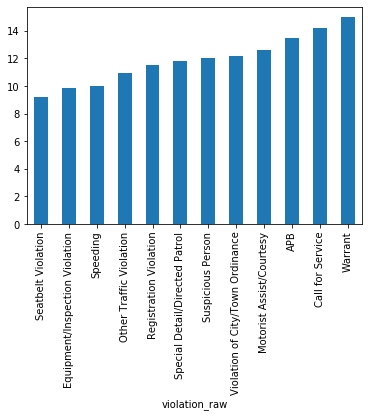

In [76]:
police.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='bar')

## Plot the results from the first groupby from the previous excercise

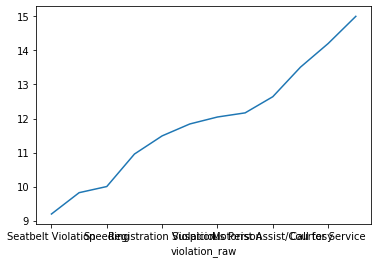

In [77]:
police.groupby('violation_raw').stop_minutes.mean().sort_values().plot()

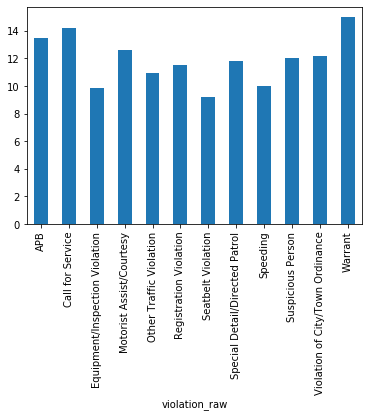

In [78]:
police.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

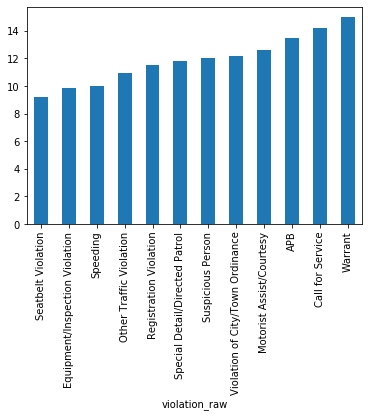

In [79]:
police.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='bar')

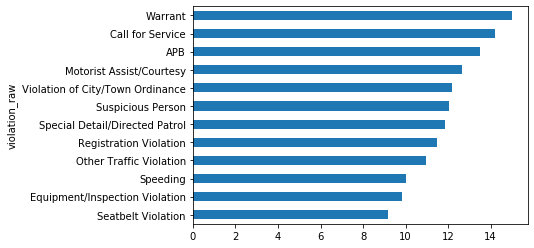

In [80]:
police.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

## Compare the age distribution for each violation

In [68]:
police.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


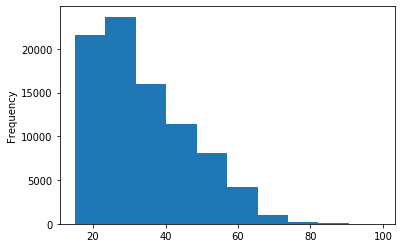

In [69]:
police.driver_age.plot(kind='hist')

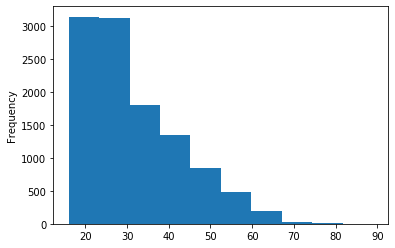

In [70]:
police[police.violation=='Equipment'].driver_age.plot(kind='hist')